In [1]:
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [2]:
NYCintersections = pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/lab2/ManhattanStreetMap_nodes.csv' , index_col=0, header=-1 )
NYCintersections.columns=['Y','X','m']
NYCintersections.head()

,Y,X,m
0,,,
30807307,40.792136,-73.962155,0
30807308,40.791991,-73.962188,0
30807309,40.791755,-73.962361,0
30807310,40.791482,-73.962549,0
30807311,40.791263,-73.962740,0


In [3]:
NYCstreets = pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/lab2/StreetMap_edges.csv' , index_col=None, header=-1 )
NYCstreets.columns=['A','B']
NYCstreets.head()

,A,B
0,33583379,33583380
1,33583380,33583379
2,33583380,33583381
3,33583381,33583380
4,33583381,33583382


In [4]:
InManhattan={}
for c in NYCintersections.index:
    InManhattan[c]=NYCintersections.m[c]

In [5]:
IntPos={}
for c in NYCintersections.index:
    IntPos[c]=(NYCintersections.X[c],NYCintersections.Y[c])

In [6]:
NYCStreets=nx.DiGraph()
for i in NYCstreets.index:
    #adding only streets inside Manhattan
    if InManhattan[NYCstreets.A[i]]&InManhattan[NYCstreets.B[i]]:
       NYCStreets.add_edge(NYCstreets.A[i],NYCstreets.B[i])

In [7]:
MLC=sorted(nx.strongly_connected_components(NYCStreets), key=len, reverse=True)
NYCStreetsC=NYCStreets.subgraph(MLC[0])

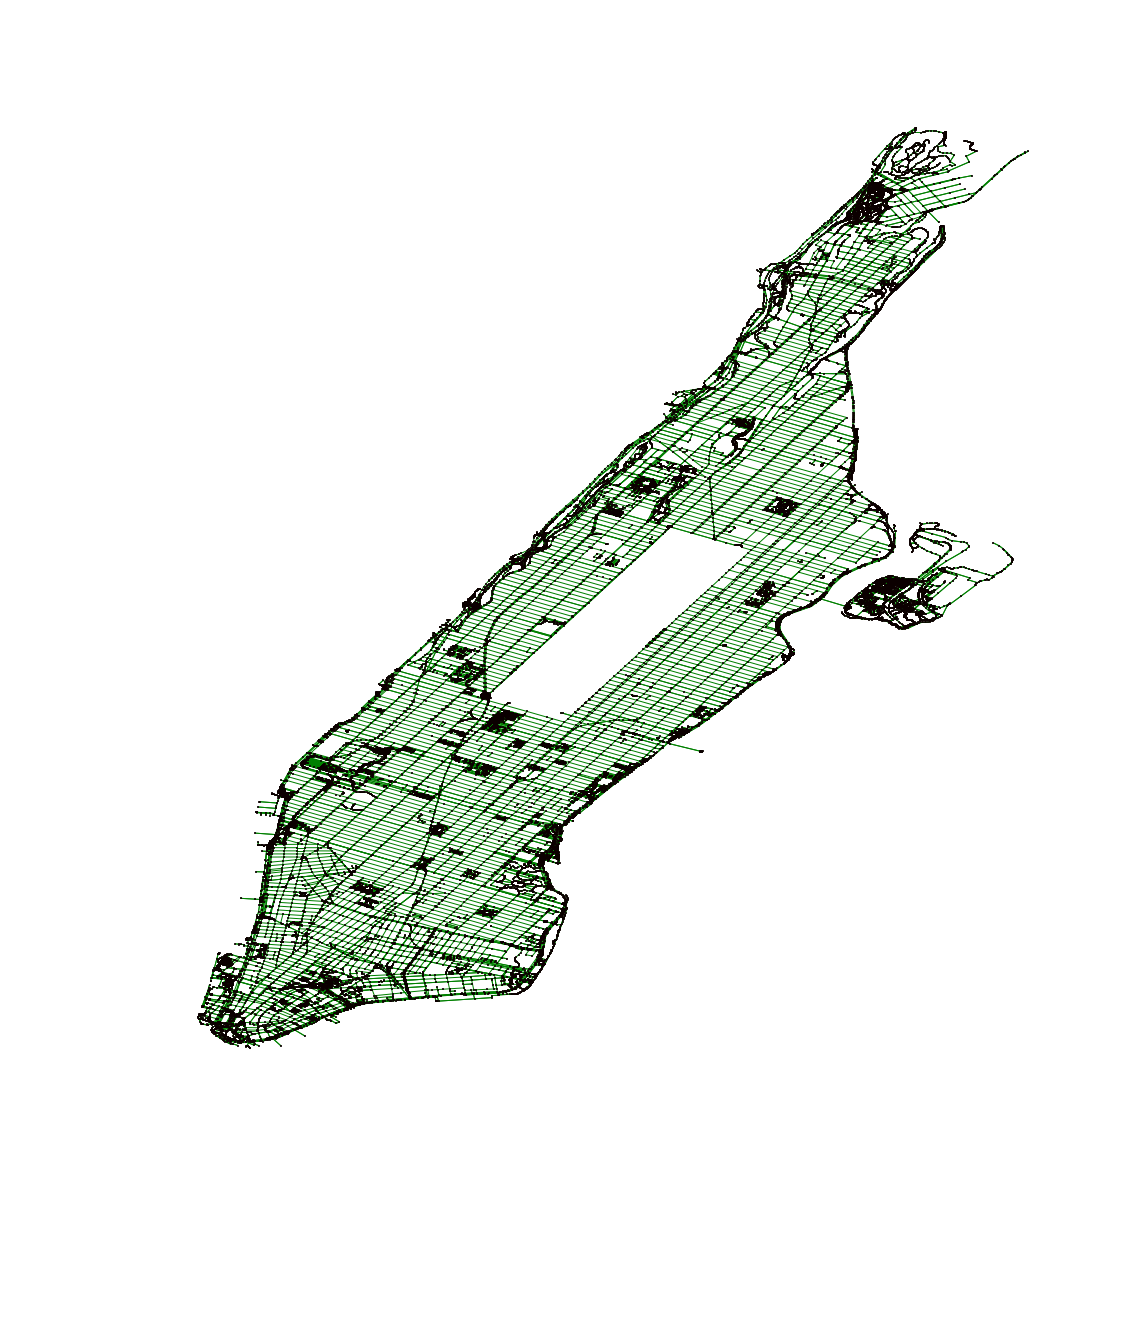

In [8]:
plt.figure(figsize = (15,18))
nx.draw(NYCStreetsC,pos=IntPos,with_labels=False,arrows=False,node_size=1,width=1,edge_color='green')

In [9]:
from math import sin, cos, sqrt, atan2, radians
def geodist(lon1,lat1,lon2,lat2):
    lat1 = radians(lat1)
    lon1 = radians(lon1)  
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    R = 6373.0
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [10]:
nx.set_edge_attributes(NYCStreetsC, 'dist', 0)

In [11]:
for e in NYCStreetsC.edges():
   NYCStreetsC[e[0]][e[1]]['dist']=geodist(IntPos[e[0]][0],IntPos[e[0]][1],IntPos[e[1]][0],IntPos[e[1]][1])

type(dist)

function

In [12]:
def closest(lon,lat):
    c=0
    d=Inf
    for n in NYCStreetsC.nodes():
        d1=geodist(IntPos[n][0],IntPos[n][1],lon,lat)
        if d1<d:
            c=n
            d=d1
    return c 

In [13]:
#Loading location of holiday attractions
holiday = pd.read_csv('NYCholidayattractions.csv')
holiday

,attraction,latitude,longitude
0,Rockefeller Center,40.758821,-73.978678
1,Radio City Music Hall,40.760134,-73.979949
2,Bryant Park Winter Wonderland,40.753588,-73.983243
3,Macy's Herald Square,40.750897,-73.988592
4,American Museum of Natural History,40.781584,-73.974010
5,Times Square,40.759131,-73.985120
6,Union Square Shops,40.735950,-73.990373
7,Central Park Ice Skating,40.767983,-73.974402
8,Grand Central Terminal,40.752913,-73.977229
9,Saks Fifth Ave,40.758216,-73.977019


In [14]:
# find the closest nodes of 10 attractions:

HolidayNodes = {}

for i in range(len(holiday['attraction'])):
    HolidayNodes[holiday['attraction'][i]] = closest(holiday['longitude'][i],holiday['latitude'][i])
    
HolidayNodes

{'American Museum of Natural History': 3248774455,
 'Bryant Park Winter Wonderland': 1289222440,
 'Central Park Ice Skating': 42430390,
 'Grand Central Terminal': 3639382769,
 "Macy's Herald Square": 1329098617,
 'Radio City Music Hall': 42430361,
 'Rockefeller Center': 806172276,
 'Saks Fifth Ave': 805765088,
 'Times Square': 2435108448,
 'Union Square Shops': 245510514}

In [15]:
PR = nx.pagerank(NYCStreets)

Pagerank = {}

for i in range(len(holiday['attraction'])):
    Pagerank[holiday['attraction'][i]] = PR[HolidayNodes[holiday['attraction'][i]]]

In [16]:
Pagerank.keys()

['Grand Central Terminal',
 'Radio City Music Hall',
 'Rockefeller Center',
 'American Museum of Natural History',
 'Union Square Shops',
 'Bryant Park Winter Wonderland',
 'Saks Fifth Ave',
 'Central Park Ice Skating',
 "Macy's Herald Square",
 'Times Square']

In [17]:
Pagerank_df = pd.DataFrame(columns = ('Attraction', 'Pagerank'))
Pagerank_df['Attraction'] = Pagerank.keys()
Pagerank_df['Pagerank'] = ["{:.4e}".format(i) for i in Pagerank.values()]
Pagerank_df = Pagerank_df.sort('Pagerank', ascending=False)
Pagerank_df.index = [i+1 for i in range(len(Pagerank_df['Attraction']))]
Pagerank_df

,Attraction,Pagerank
1,Radio City Music Hall,3.6169e-06
2,Saks Fifth Ave,2.7606e-06
3,Bryant Park Winter Wonderland,2.5893e-06
4,American Museum of Natural History,2.4180e-06
5,Times Square,2.0755e-06
6,Central Park Ice Skating,2.0755e-06
7,Grand Central Terminal,2.0755e-06
8,Rockefeller Center,1.7330e-06
9,Macy's Herald Square,1.5617e-06
10,Union Square Shops,1.5617e-06


In [18]:
EC = nx.eigenvector_centrality(NYCStreets)

Eigenvector = {}

for i in range(len(holiday['attraction'])):
    Eigenvector[holiday['attraction'][i]] = EC[HolidayNodes[holiday['attraction'][i]]]

In [19]:
Eigenvector_df = pd.DataFrame(columns = ('Attraction', 'Eigenvector'))
Eigenvector_df['Attraction'] = Eigenvector.keys()
Eigenvector_df['Eigenvector'] = ["{:.4e}".format(i) for i in Eigenvector.values()]
Eigenvector_df = Eigenvector_df.sort('Eigenvector', ascending=False)
Eigenvector_df.index = [i+1 for i in range(len(Eigenvector_df['Attraction']))]
Eigenvector_df

,Attraction,Eigenvector
1,Macy's Herald Square,7.7046e-07
2,Radio City Music Hall,7.4698e-07
3,Grand Central Terminal,6.7280e-08
4,Saks Fifth Ave,4.3264e-07
5,Central Park Ice Skating,3.7810e-06
6,Rockefeller Center,3.2690e-08
7,Bryant Park Winter Wonderland,3.1389e-07
8,Union Square Shops,2.0929e-06
9,Times Square,1.5318e-07
10,American Museum of Natural History,1.0324e-10


In [20]:
def visualize_path(path):
    nx.draw(NYCStreetsC,pos=IntPos,with_labels=False,arrows=False,node_size=1,width=1,edge_color='green')
    x=[IntPos[v][0] for v in path]
    y=[IntPos[v][1] for v in path]
    plt.plot(x,y,'ro-')
    plt.plot([x[0],x[-1]],[y[0],y[-1]],'bs',markersize=10)

In [21]:
#Calculating length matrix among all points
#Row -> Column
#Results in km
attractions_list = ['Rockefeller Center', 'Radio City Music Hall', 'Bryant Park Winter Wonderland', "Macy's Herald Square", 'American Museum of Natural History', 'Times Square', 
                    'Union Square Shops', 'Central Park Ice Skating', 'Grand Central Terminal', 'Saks Fifth Ave']
length_matrix = pd.options.display.float_format = '{:,.4f}'.format
length_matrix = pd.DataFrame(columns = attractions_list, index = attractions_list)
for a in attractions_list:
    for b in attractions_list:
        length_matrix[a][b] = nx.shortest_path_length(NYCStreetsC, HolidayNodes[b], HolidayNodes[a], 'dist')
length_matrix        

,Rockefeller Center,Radio City Music Hall,Bryant Park Winter Wonderland,Macy's Herald Square,American Museum of Natural History,Times Square,Union Square Shops,Central Park Ice Skating,Grand Central Terminal,Saks Fifth Ave
Rockefeller Center,0,0.3169,0.9721,1.6439,3.5474,0.6748,2.8872,0.8894,0.8712,0.2136
Radio City Music Hall,0.5261,0,1.2888,1.5999,3.2306,0.6252,3.2039,0.5725,1.1879,0.4222
Bryant Park Winter Wonderland,1.0095,0.9609,0,0.9007,4.1153,0.8824,2.2536,1.5334,0.5856,1.1599
Macy's Herald Square,1.3882,1.3397,0.6965,0,4.4558,1.2612,1.7093,1.9122,1.2463,1.5386
American Museum of Natural History,3.5243,3.3651,4.0544,4.1941,0,3.1892,5.8747,2.7527,4.3139,3.6296
Times Square,0.8315,0.7798,0.8824,1.0220,3.2500,0,2.7027,1.3523,1.1418,0.9819
Union Square Shops,3.1978,3.3522,2.7090,2.0863,6.5065,3.2737,0,3.9247,2.3354,3.2429
Central Park Ice Skating,1.1440,1.1930,1.8598,2.5316,3.4654,1.8151,3.7749,0,1.7590,0.9929
Grand Central Terminal,0.8729,1.1877,0.5843,1.2561,4.3661,1.1332,2.4994,1.7602,0,0.9180
Saks Fifth Ave,0.2020,0.4224,0.8669,1.5388,3.6530,0.8251,2.7820,0.9949,0.7661,0


In [22]:
#Calculating driving duration matrix among all points
#Row -> Column
#Using average speed of 15km/h (NYC avg)
#Results in seconds
#Results are quite similar to Google's API for most of the routes
seconds_matrix = pd.options.display.float_format = '{:,.0f}'.format
seconds_matrix = pd.DataFrame(columns = attractions_list, index = attractions_list)
for a in attractions_list:
    for b in attractions_list:
        seconds_matrix[a][b] = (nx.shortest_path_length(NYCStreetsC, HolidayNodes[b], HolidayNodes[a], 'dist'))/15*3600
seconds_matrix        

,Rockefeller Center,Radio City Music Hall,Bryant Park Winter Wonderland,Macy's Herald Square,American Museum of Natural History,Times Square,Union Square Shops,Central Park Ice Skating,Grand Central Terminal,Saks Fifth Ave
Rockefeller Center,0,76,233,395,851,162,693,213,209,51
Radio City Music Hall,126,0,309,384,775,150,769,137,285,101
Bryant Park Winter Wonderland,242,231,0,216,988,212,541,368,141,278
Macy's Herald Square,333,322,167,0,"1,069",303,410,459,299,369
American Museum of Natural History,846,808,973,"1,007",0,765,"1,410",661,"1,035",871
Times Square,200,187,212,245,780,0,649,325,274,236
Union Square Shops,767,805,650,501,"1,562",786,0,942,561,778
Central Park Ice Skating,275,286,446,608,832,436,906,0,422,238
Grand Central Terminal,209,285,140,301,"1,048",272,600,422,0,220
Saks Fifth Ave,48,101,208,369,877,198,668,239,184,0


In [259]:
#Finding out best route for all holiday spots if you only consider the distances from your current spot
#This is a bad strategy, as you will be obliged to take long trips towards the end of the tour (e.g. Union Square/Central Park) 

stops_list = []
stops_list.append('Radio City Music Hall')

distances = {}
for i in holiday['attraction']:
    distances[i] = {}

for i in range(len(holiday['attraction'])-1):
    for g in list(set(holiday['attraction'])-set(stops_list)):
        distances[stops_list[i]][g] = seconds_matrix.ix[stops_list[i]][g]
    stops_list.append(min(distances[stops_list[i]], key=distances[stops_list[i]].get))
    
stops_list

['Radio City Music Hall',
 'Saks Fifth Ave',
 'Rockefeller Center',
 'Times Square',
 'Bryant Park Winter Wonderland',
 'Grand Central Terminal',
 "Macy's Herald Square",
 'Union Square Shops',
 'Central Park Ice Skating',
 'American Museum of Natural History']

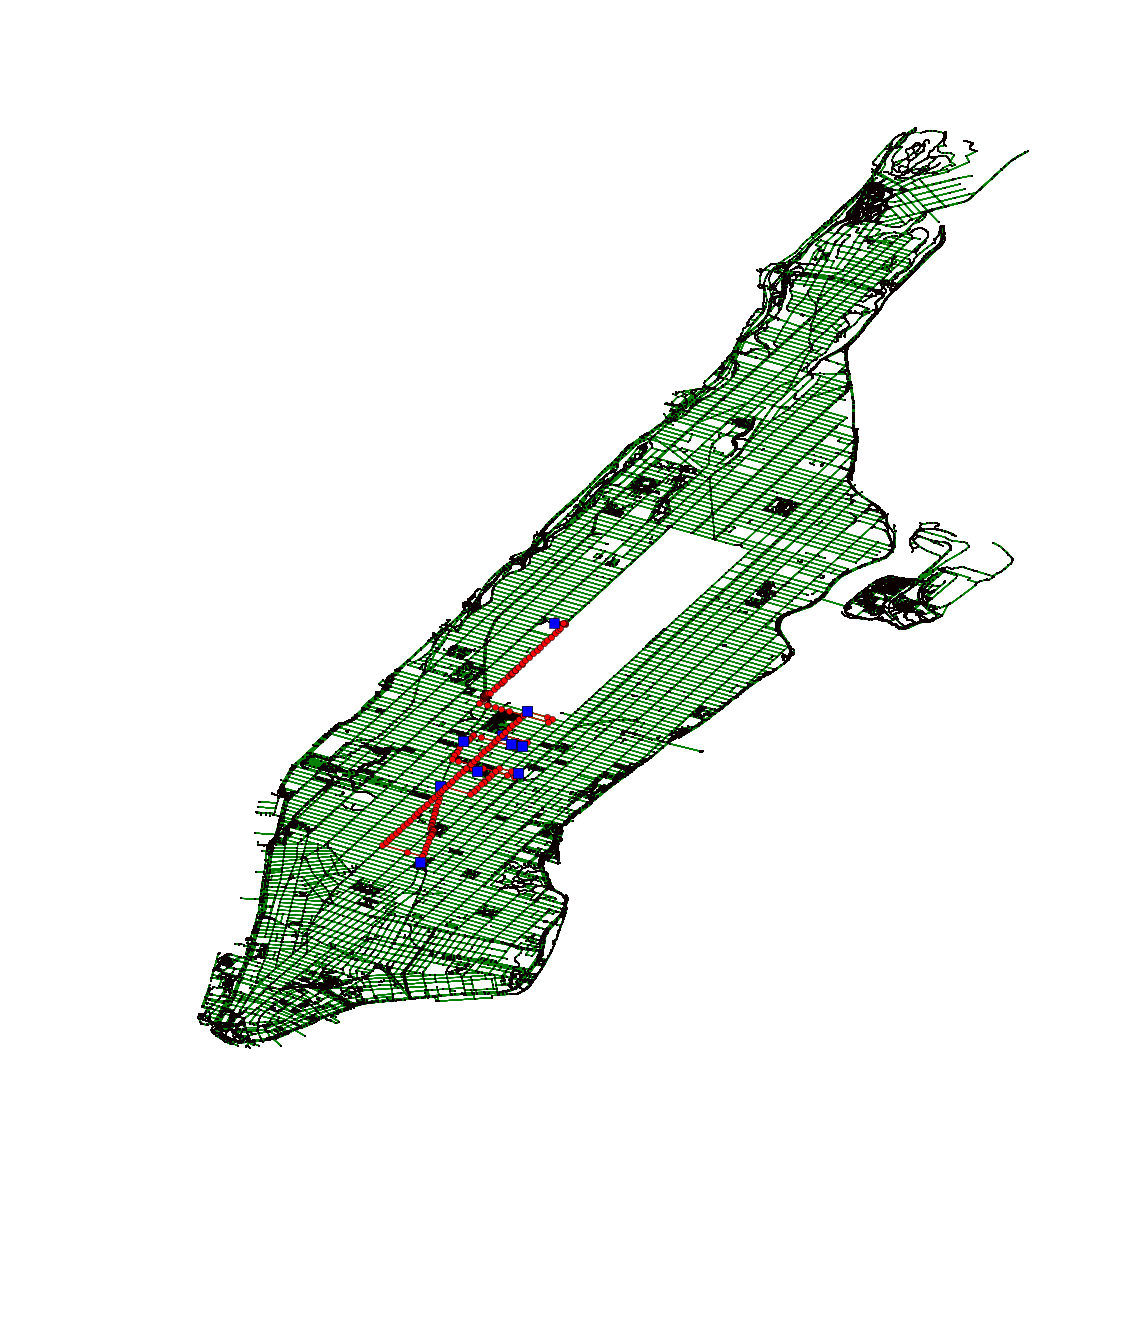

In [265]:
#Visualizing route
plt.figure(figsize = (15,18))
for i in range(0,9): 
    visualize_path(nx.shortest_path(NYCStreetsC, HolidayNodes[stops_list[i]], HolidayNodes[stops_list[i+1]], 'dist'))